In [ ]:
!pip install bertopic

In [1]:
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Define custom scoring function
def my_score(X, labels):
    return silhouette_score(X, labels=True)

from sklearn.metrics import mean_squared_error, mean_squared_log_error

!pip install pandas==1.5.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
%cd gdrive/MyDrive/TxtAnalytics_Proj

searchMatrix = pd.read_pickle("X_Train.pkl")

Mounted at /content/gdrive
/content/gdrive/MyDrive/TxtAnalytics_Proj


In [8]:
#skip
stop_list = ("suicidal", "suicide", "aah", "fuck", "fucking", "na")
text_data = searchMatrix['text_lemmatized'].to_numpy()
text_data = [[w for w in doc if w not in stop_list] for doc in text_data]

text_data_lemmatized_joined = [' '.join(x) for x in text_data]  # joined to fit CountVectorizer
print(text_data_lemmatized_joined[:6])
#text_data_lemmatized_joined = delete_less_than_k(text_data_lemmatized_joined, 3)

#vectorizer = TfidfVectorizer(stop_words='english')
# Fit the vectorizer and transform the text data
#data_vectorized = vectorizer.fit_transform(text_data_lemmatized_joined)

#feature_names1 = vectorizer.get_feature_names_out()

['help help feel bad', 'go situation worsen recent month fail important exam need finish college thesis get rejected relationship toxic eternity continue toxic close friend look desert start bald option follow completely rework thesis include travel country outside research lot photos write thirty day retake exam day supervisor suggest prolong study year write thesis afford financially morally parent retire work family business obligation finish study finish thesis time simultaneously study exam future college rob youth semblance literally fall head go rob attractiveness enjoy life thing obligation routine somewhat attractive hair loss begin didst relationship girl anxiety inability connect people live bore life start fail class switch art orient high school good art pursue college field attract useless financial perspective realize overestimate unable understand stuff learn thesis suppose focus ideology prot fascism influence architecture supervisor approve rejected day ago confront t

In [4]:
#skip
import bertopic
from umap import UMAP
#from bertopic import Preprocessor
from bertopic import BERTopic
#from sklearn.manifold import TSNE

#preprocessor = Preprocessor(language='english')
#hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', prediction_data=True)
umap_model = UMAP(n_neighbors=15, n_components=10, metric='cosine', low_memory=False)
topic_model = BERTopic(top_n_words =15, umap_model=umap_model,
                       calculate_probabilities=True, 
                       verbose = False)
topics, probs = topic_model.fit_transform(text_data_lemmatized_joined)

#print(data_vectorized[:20][0:])
# Print the top words for each topic
#feature_names = vectorizer.get_feature_names_out()
#for topic_idx, topic in enumerate(NMF_model.components_):
#    top_words = [feature_names[i] for i in topic.argsort()[:-15 - 1:-1]]
#    print(f"Topic {topic_idx}: {', '.join(top_words)}")

#for topic_idx, topic in enumerate(NMF_model2.components_):
#    top_words = [feature_names[i] for i in topic.argsort()[:-15 - 1:-1]]
#    print(f"Topic {topic_idx}: {', '.join(top_words)}")



In [5]:
import joblib
import numpy as np
topic_model.save('bertTopic_suicidal_model.jl')
joblib.dump(probs, 'bertTopic_suicidal_probs.jl')
joblib.dump(topics, 'bertTopic_suicidal_topic.jl')


/usr/local/lib/python3.9/dist-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


['bertTopic_suicidal_topic.jl']

In [6]:
from sklearn.metrics import log_loss
import numpy as np

epsilon = 1e-8
log_perplexity = -1 * np.mean(np.log(np.sum(probs, axis=1) + epsilon))
perplexity = np.exp(log_perplexity)
print("Perplexity:", perplexity)

# compute log likelihood
log_likelihood = -1 * np.log(perplexity)
print("Log Likelihood:", log_likelihood)

Perplexity: 1.7398559052004576
Log Likelihood: -0.553802296694058


In [7]:
# get top 10 topics
top_n_topics = 10
topic_freq = topic_model.get_topic_freq()
top_topics = topic_freq.nlargest(top_n_topics, 'Count')

# extract the topic IDs and top words
topic_ids = top_topics['Topic']
top_words = [topic_model.get_topic(topic_id)[:15] for topic_id in topic_ids]

# create a pandas dataframe with the top topics and top words
word_lists = []
for topic_id in topic_ids:
    words = topic_model.get_topic(topic_id)
    word_list = [word[0] for word in words[:15]]
    word_lists.append(word_list)

df = pd.DataFrame(word_lists, columns=["Word "+str(i) for i in range(15)], 
                  index=["Topic "+str(i) for i in range(top_n_topics)])

print('The bertopic version is {}.'.format(bertopic.__version__))

df

The bertopic version is 0.14.1.


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,feel,want,live,life,like,know,think,kill,anymore,die,people,go,end,try,help
Topic 1,didst,time,school,start,year,get,tell,thing,like,say,friend,go,work,know,people
Topic 2,job,college,fail,pay,debt,class,school,money,semester,university,degree,work,study,grade,graduate
Topic 3,dad,parent,father,mother,mon,son,tell,he,child,daughter,yell,say,help,nt,abusive
Topic 4,overdose,pill,paracetamol,take,bottle,ibuprofen,tablet,liver,tylenol,alcohol,lethal,sleep,acetaminophen,swallow,aspirin
Topic 5,friend,best,shes,he,help,tell,say,talk,message,advice,online,know,friendship,need,recently
Topic 6,girlfriend,shes,break,boyfriend,relationship,cheat,love,say,tell,he,sex,help,do,month,girl
Topic 7,talk,chat,need,somebody,pm,message,anybody,hey,listen,hi,right,talkie,help,willing,want
Topic 8,cut,wrist,knife,blade,bleed,slit,arm,blood,razor,sharp,vein,deep,artery,skin,stop
Topic 9,gun,shoot,shotgun,buy,trigger,bullet,pull,firearm,head,load,pistol,shot,gauge,mouth,access


In [ ]:
#topics, probs = topic_model.transform(text_data_lemmatized_joined)


In [8]:
# Prepare data for PyLDAVis
top_n = 10

topic_term_dists = topic_model.c_tf_idf_.toarray()[:top_n+1, ]
new_probs = probs[:, :top_n]
outlier = np.array(1 - new_probs.sum(axis=1)).reshape(-1, 1)
doc_topic_dists = np.hstack((new_probs, outlier))
doc_lengths = [len(doc) for doc in text_data]
vocab = [word for word in topic_model.vectorizer_model.vocabulary_.keys()]
term_frequency = [topic_model.vectorizer_model.vocabulary_[word] for word in vocab]



In [9]:
topic_term_dists_norm = topic_term_dists / (topic_term_dists.sum(axis=1, keepdims=True) + epsilon)
# find the rows in W_norm that do not sum up to 1
problematic_rows = np.where(np.abs(topic_term_dists_norm.sum(axis=1) - 1) > epsilon)[0]
topic_term_dists_norm[problematic_rows, :] = 1
# print the indices of the problematic rows
print("Problematic rows:", len(problematic_rows))

Problematic rows: 0


In [10]:
# create the pyLDAvis data
data = {'topic_term_dists': topic_term_dists_norm,
        'doc_topic_dists': doc_topic_dists,
        'doc_lengths': doc_lengths,
        'vocab': vocab,
        'term_frequency': term_frequency}

In [11]:
!pip install pyldavis pyLDAvis==3.4.0
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.9 MB/s eta 0:00:00


In [13]:
print('The pyLDAvis-learn version is {}.'.format(pyLDAvis.__version__))
# Visualize using pyLDAvis
panel= pyLDAvis.prepare(**data, mds='tsne')
panel

The pyLDAvis-learn version is 3.4.0.


/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
10     34.099777 -56.597469       1        1  92.712756
0     -39.363468 -15.202540       2        1   4.368608
1      36.032990  56.306896       3        1   0.483788
5      65.450485 -22.422363       4        1   0.398172
2      -9.674269  64.094467       5        1   0.397075
4       8.547065 -20.254213       6        1   0.388626
9      76.280136  26.871624       7        1   0.271348
3     -16.957172 -56.706245       8        1   0.260330
7      35.383633  10.951474       9        1   0.249066
8      -5.036313  19.845070      10        1   0.247192
6     -48.272877  30.759663      11        1   0.223039, topic_info=                           Term          Freq         Total Category  logprob  \
35802  unhealthysugaryfattening  41840.000000  41840.000000  Default  30.0000   
8167                      purge  25515.000000  25515.000000  Default  29.0000   
13581                 sickening  14023.000000  14023.000000  Default  28.0000   
38542            goneforeverrip  14024.000000  14024.000000  Default  27.0000   
39633         sufferingrepostmy  17211.000000  17211.000000  Default  26.0000   
...                         ...           ...           ...      ...      ...   
23455            opinionhellomy     31.513905   7024.719892  Topic11  -6.0608   
35282         advicesupportthis     32.276160   9649.894172  Topic11  -6.0369   
20870              multimillion     28.619314   4591.075212  Topic11  -6.1571   
14389                registered     32.038165  11344.193868  Topic11  -6.0443   
19502     wishitwouldbethateasy     31.960421  12425.743738  Topic11  -6.0467   

       loglift  
35802  30.0000  
8167   29.0000  
13581  28.0000  
38542  27.0000  
39633  26.0000  
...        ...  
23455   0.6988  
35282   0.4052  
20870   1.0278  
14389   0.2360  
19502   0.1426  

[1222 rows x 6 columns], token_table=       Topic      Freq                                               Term
term                                                                     
16311      1  0.963492  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
16311      2  0.023990  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
16311      3  0.001612  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
16311      4  0.001896  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
16311      5  0.002465  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
...      ...       ...                                                ...
39749      8  0.016577  yourselfhttpswwwredditcomrsuicidewatchcomments...
39749     10  0.003684  yourselfhttpswwwredditcomrsuicidewatchcomments...
39749     11  0.007368  yourselfhttpswwwredditcomrsuicidewatchcomments...
2196       5  1.009151                                                yrs
3446       1  1.000260                                                zip

[4332 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 1, 2, 6, 3, 5, 10, 4, 8, 9, 7])

In [15]:
pyLDAvis.save_html(panel, 'bert_suicidal.html')

In [16]:
# Construct the k-means clusters
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD


clusters = KMeans(n_clusters=10, random_state=100).fit_predict(topic_term_dists)
# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(topic_term_dists)
# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]
# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))
# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.  0.  0. ...  0.  0.  0.]
 [-0. -0. -0. ... -0. -0. -0.]]
Perc of Variance Explained: 
 [0.03 0.23]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

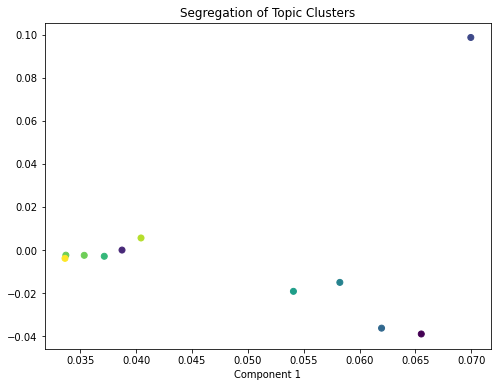

In [17]:
import matplotlib.pyplot as plot

plot.figure(figsize=(8,6))
plot.scatter(x, y, c=clusters)
plot.xlabel('Component 2')
plot.xlabel('Component 1')
plot.title("Segregation of Topic Clusters", )

In [18]:
from gensim.models import CoherenceModel
import gensim.corpora as corpora

def get_Cv(model, df_column):
  documents = pd.DataFrame({"Document": df_column,
                          "ID": range(len(df_column)),
                          "Topic": topics})
  documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
  cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

  # Extract vectorizer and analyzer from BERTopic
  vectorizer = topic_model.vectorizer_model
  analyzer = vectorizer.build_analyzer()

  # Extract features for Topic Coherence evaluation
  words = vectorizer.get_feature_names_out()
  tokens = [analyzer(doc) for doc in cleaned_docs]
  dictionary = corpora.Dictionary(tokens)
  corpus = [dictionary.doc2bow(token) for token in tokens]
  topic_words = topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!=''] 
                for topic in range(len(set(topics))-1)]


  # Evaluate
  coherence_model = CoherenceModel(topics=topic_words, 
                                  texts=tokens, 
                                  corpus=corpus,
                                  dictionary=dictionary, 
                                  coherence='c_v')
  return coherence_model.get_coherence()

/usr/local/lib/python3.9/dist-packages/gensim/matutils.py:23: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu
/usr/local/lib/python3.9/dist-packages/gensim/corpora/dictionary.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping, defaultdict


In [19]:
coherence = get_Cv(df_column=text_data_lemmatized_joined, model=topic_model)

In [31]:
print(coherence)

0.39868307764956956


# Prediction here

In [2]:
import bertopic
import pandas as pd
from bertopic import BERTopic
import joblib
topic_model = BERTopic.load('bertTopic_suicidal_model.jl')
probs = joblib.load('bertTopic_suicidal_probs.jl')
topics = joblib.load('bertTopic_suicidal_topic.jl')


In [3]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(topic_model.get_topic_freq())
# Assign Column and Index
df_topic_keywords.columns = ["Count", "Keywords"]
topicnames = ["Topic" + str(i) for i in range(len(df_topic_keywords))]
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()

,Count,Keywords
Topic0,-1,52322
Topic1,0,7773
Topic2,1,2141
Topic3,2,1065
Topic4,3,1051


In [4]:
# get top 10 topics
top_n_topics = 10  + 1
topic_freq = topic_model.get_topic_freq()
top_topics = topic_freq.nlargest(top_n_topics, 'Count')

# extract the topic IDs and top words
topic_ids = top_topics['Topic']
top_words = [topic_model.get_topic(topic_id)[:15] for topic_id in topic_ids]

# create a pandas dataframe with the top topics and top words
word_lists = []
for topic_id in topic_ids:
    words = topic_model.get_topic(topic_id)
    word_list = [word[0] for word in words[:15]]
    word_lists.append(word_list)

df_topic_keywords = pd.DataFrame(word_lists, columns=["Word "+str(i) for i in range(15)], 
                  index=["Topic "+str(i) for i in range(top_n_topics)])

print('The bertopic version is {}.'.format(bertopic.__version__))

df_topic_keywords

The bertopic version is 0.14.1.


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,feel,want,live,life,like,know,think,kill,anymore,die,people,go,end,try,help
Topic 1,didst,time,school,start,year,get,tell,thing,like,say,friend,go,work,know,people
Topic 2,job,college,fail,pay,debt,class,school,money,semester,university,degree,work,study,grade,graduate
Topic 3,dad,parent,father,mother,mon,son,tell,he,child,daughter,yell,say,help,nt,abusive
Topic 4,overdose,pill,paracetamol,take,bottle,ibuprofen,tablet,liver,tylenol,alcohol,lethal,sleep,acetaminophen,swallow,aspirin
Topic 5,friend,best,shes,he,help,tell,say,talk,message,advice,online,know,friendship,need,recently
Topic 6,girlfriend,shes,break,boyfriend,relationship,cheat,love,say,tell,he,sex,help,do,month,girl
Topic 7,talk,chat,need,somebody,pm,message,anybody,hey,listen,hi,right,talkie,help,willing,want
Topic 8,cut,wrist,knife,blade,bleed,slit,arm,blood,razor,sharp,vein,deep,artery,skin,stop
Topic 9,gun,shoot,shotgun,buy,trigger,bullet,pull,firearm,head,load,pistol,shot,gauge,mouth,access


In [9]:
# Further reduce topics
topic_model.reduce_topics(text_data_lemmatized_joined, nr_topics=10)

In [5]:
#!spacy download en_core_web_sm
import gensim
import numpy as np

# Define function to predict topic for a given text document.
#!pip install -U spacy
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def predict_topic(model, vectorizer, text):

    if len(text) == 0:
      return None, -1
    else:
      global sent_to_words
      global lemmatization
      
      # Step 1: Clean with simple_preprocess
      mytext_2 = list(sent_to_words(text))
      # Step 2: Lemmatize
      mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
      
      # Step 3: Transform
      topics, topic_probability_scores = model.transform(mytext_3)
      
      # Step 5: Infer Topic
      # Get the topic with the highest probability for each document
      top_topics = np.argmax(topic_probability_scores, axis=1)

      # Map topic IDs to topic labels
      topic_labels = model.get_topic_freq().Topic.to_dict()

      # Get the topic labels for each document
      topic_labels = [topic_labels.get(topic_id) for topic_id in top_topics]

      # Print the topic labels for each document
      infer_topicNo = topic_labels[0]
      topic_words = model.get_topic(topic=infer_topicNo)
      word_lists = []
      for w in topic_words:
          word_lists.append(w[0])

      topic = word_lists
      #print (topic)
      #for i, text in enumerate(text):
      #    print(f"Document {i}: nTopic: {topic_labels[i]}")
      return topic, infer_topicNo


In [6]:
mytext = [""" i wanna jump from an elevated place. i wanna kill myself, like really really would like to jump off an elevated place, but not die what do i do? drugs? fall from somewhere not far above the ground(like a 4meters jump)? you know, i'd just like to die but i have a gr8 life other than that (I have different lives in two different countries, just want to kill myself in one)

         """]

topic, infer_topicNo = predict_topic(topic_model, vectorizer = topic_model.vectorizer_model, text = mytext)

print("Topic: " + str(infer_topicNo) )
print(topic)

Topic: 14
['depression', 'depressed', 'depress', 'help', 'therapy', 'feel', 'try', 'advice', 'well', 'month', 'lately', 'need', 'medication', 'think', 'live']
